In [1]:
import joblib
import MeCab

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import pandas_profiling as pdp

In [3]:
train_df = pd.read_csv('train.csv')

In [5]:
train_df.head(100
             )

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797
5,51e0962387f7,bbfad0b1ad0a,Татарстан,Чистополь,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Авто люлька,В хорошем состоянии,1300.0,9,2017-03-28,Private,eb6ad1231c59d3dc7e4020e724ffe8e4d302023ddcbb99...,796.0,0.80323
6,c4f260a2b48a,08f469d2e6f7,Нижегородская область,Нижний Новгород,Для дома и дачи,Ремонт и строительство,Сантехника и сауна,NaN,NaN,Водонагреватель 100 литров нержавейка плоский,Электро водонагреватель накопительный на 100 л...,11000.0,125,2017-03-23,Private,0330f6ac561f5db1fa8226dd5e7e127b5671d44d075a98...,2823.0,0.00000
7,6b71309d6a8a,fef86baa002c,Пермский край,Пермь,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы,26,Бойфренды colins,Бойфренды в хорошем состоянии.,500.0,61,2017-03-25,Private,9bab29a519e81c14f4582024adfebd4f11a4ac71d323a6...,567.0,0.80323
8,c5b969cb63a2,055825270190,Оренбургская область,Оренбург,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,> 50 (XXL),Платье,54 раз мер очень удобное,500.0,85,2017-03-17,Private,75ce06d1f939a31dfb2af8ac55f08fa998fa336d13ee05...,415.0,0.00000
9,b1570962e68c,f9e8f831d94c,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,25,Полу ботиночки замш натур.Бамбини,По стельке 15.5см мерить приокский район. Цвет...,400.0,136,2017-03-22,Company,54fb8521135fda77a860bfd2fac6bf46867ab7c06796e3...,46.0,0.00000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null object
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: float64(3), int

In [7]:
test_df = pd.read_csv('test.csv')

In [8]:
#コードの上限を確認
train_df["image_top_1"].max()

3066.0

In [9]:
#コードの上限を確認
test_df["image_top_1"].max()
test_df["image_top_2"]=test_df["image_top_1"].replace(pd.np.NaN , 3067.0)

In [10]:
#imageのないものを3067のコードを割り当て
train_df["image_top_2"]=train_df["image_top_1"].replace(pd.np.NaN , 3067.0)

In [11]:
train_df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,image_top_2
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,1008.0
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,692.0
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,3032.0
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,796.0
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,2264.0


In [12]:
#"image_top_2"欠損値なしに
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 19 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null object
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
image_top_2            

In [13]:
#次はparam_1の欠損値を上位項目であるcategory_nameの最頻値で置き換える.
#まず上位カテゴリの最頻値を確認
train_df.groupby('category_name').param_1.apply(lambda x: x.mode())

category_name                  
Автомобили                    0                   С пробегом
Аудио и видео                 0       Телевизоры и проекторы
Билеты и путешествия          0                  Путешествия
Бытовая техника               0                    Для кухни
Велосипеды                    0                      Детские
Водный транспорт              0               Моторные лодки
Гаражи и машиноместа          0                       Продам
Готовый бизнес                0                     Торговля
Грузовики и спецтехника       0                    Грузовики
Детская одежда и обувь        0                  Для девочек
Дома, дачи, коттеджи          0                       Продам
Другие животные               0                 С/х животные
Земельные участки             0                       Продам
Игры, приставки и программы   0            Игровые приставки
Квартиры                      0                       Продам
Книги и журналы               0                      

In [14]:
train_df.ix[train_df["category_name"] == "Продукты питания"]

C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,image_top_2
92,c2468f15b136,451e557a9de6,Краснодарский край,Петровская,Для дома и дачи,Продукты питания,NaN,NaN,NaN,Яйцо куриное,Яйцо домашние всегда свежее.,60.0,1,2017-03-19,Private,NaN,NaN,0.11508,3067.0
229,94f9e5972f8d,be6160f26a84,Волгоградская область,Волгоград,Для дома и дачи,Продукты питания,NaN,NaN,NaN,Сладкий подарок,Фиолетовая композиция (коробочка конфет) розов...,300.0,50,2017-03-27,Company,c28387a546fc3c52bfc97a155c3139be03c3770c889fc2...,133.0,0.00000,133.0
286,4c68d327ddc6,4bd2684f39a5,Нижегородская область,Арзамас,Для дома и дачи,Продукты питания,NaN,NaN,NaN,"Свекла ""Пабло""","Это среднесозревающий, чрезвычайно выносливый ...",10.0,4,2017-03-27,Private,841a0de6d521957f4f38fa1cdd9cdb6969a6a198829717...,1753.0,0.00000,1753.0
334,349e640ca2ec,dc6f9054cb15,Волгоградская область,Камышин,Для дома и дачи,Продукты питания,NaN,NaN,NaN,Домашние яйца,Продаю домашние куриные яйца,60.0,2,2017-03-19,Private,NaN,NaN,0.12311,3067.0
433,2405102c8c4a,d8ca8703c2a1,Краснодарский край,Кореновск,Для дома и дачи,Продукты питания,NaN,NaN,NaN,"Мед Самарский липа, цветок за 3литр балон",NaN,1600.0,6,2017-03-24,Private,38917f9ed3bef09689cb21c49d56182822173d9cd1211e...,1819.0,0.19661,1819.0
526,4a10ea31ee13,e2fc5ca89c8d,Башкортостан,Уфа,Для дома и дачи,Продукты питания,NaN,NaN,NaN,Беллакт Мама для беременных женщин и кормящих,Отдам за плитку шоколада))) 2 пачки: продукт с...,NaN,7,2017-03-21,Private,fc30922b24c9aa1dce93024f72464ae2d77b23259de24a...,1188.0,0.16589,1188.0
677,270ca427034a,4c290a27b1f6,Новосибирская область,Новосибирск,Для дома и дачи,Продукты питания,NaN,NaN,NaN,Иван-чай Алтайский с красной рябиной весовой наро,"Состав: Кипрей узколистный ферментированный, п...",88.0,88,2017-03-23,Company,4a88c31c0054422b5f82643d0d774458ceb7c8c4295a01...,1179.0,0.00000,1179.0
958,9b72ace42d44,b3320688140f,Тюменская область,Тюмень,Для дома и дачи,Продукты питания,NaN,NaN,NaN,Варенье.лечо.салаты,помидорчики..огурчики отменные-вы таких не ели...,50.0,414,2017-03-23,Company,5d4cd31728331951e56f0757af8df2d7c69d724704d178...,1174.0,0.86521,1174.0
1003,dd5d676424de,6b16e497a8e2,Красноярский край,Красноярск,Для дома и дачи,Продукты питания,NaN,NaN,NaN,Сало деревенское,"Сало деревенское свежее, толстый шпик. Всегда ...",NaN,1,2017-03-19,Private,c6da164a8ee541cb4ed0d6527d103960d7db51d22f0372...,2480.0,0.36803,2480.0
1332,65b2e8fa99db,efe2ac15c082,Алтайский край,Барнаул,Для дома и дачи,Продукты питания,NaN,NaN,NaN,Кета холодного копчения,"Балык кеты, боковник кеты, теша кеты. Натураль...",562.0,38,2017-03-17,Company,c5b1195d13a7348b82ffa2a73fcdf5ae56160d86c8ad0c...,707.0,0.21195,707.0


In [3]:
#上記結果をもとにカテゴリとサブカテゴリ最頻値の辞書作成
#"Товары для животных"はすべてがNaNだったんので同じものを代入
dict = {"Автомобили":"С пробегом",
        "Аудио и видео":"Телевизоры и проекторы" ,
       "Билеты и путешествия":"Путешествия",
       "Бытовая техника":"Для кухни",
       "Велосипеды":"Детские",
        "Водный транспорт":"Моторные лодки",
        "Гаражи и машиноместа":"Продам",
        "Готовый бизнес":"Торговля",
        "Грузовики и спецтехника":"Грузовики",
        "Детская одежда и обувь":"Для девочек",
        "Дома, дачи, коттеджи":"Продам",
        "Другие животные":"С/х животные",
        "Земельные участки":"Продам",
        "Игры, приставки и программы":"Игровые приставки",
        "Квартиры":"Продам",
        "Книги и журналы":"Книги",
        "Коллекционирование":"Другое",
        "Коммерческая недвижимость":"Сдам",
        "Комнаты":"Продам",
        "Кошки":"Другая",
        "Красота и здоровье":"Приборы и аксессуары",
        "Мебель и интерьер":"Кровати, диваны и кресла",
        "Мотоциклы и мототехника":"Мотоциклы",
        "Музыкальные инструменты":"Гитары и другие струнные",
        "Недвижимость за рубежом":"Продам",
        "Оборудование для бизнеса":"Промышленное",
        "Одежда, обувь, аксессуары":"Женская одежда",
        "Оргтехника и расходники":"Принтеры",
        "Планшеты и электронные книги":"Планшеты",
        "Посуда и товары для кухни":"Посуда",
        "Предложение услуг":"Ремонт, строительство",
        "Ремонт и строительство":"Стройматериалы",
        "Собаки":"Другая",
        "Спорт и отдых":"Фитнес и тренажёры",
        "Телефоны":"iPhone",
        "Товары для детей и игрушки":"Игрушки",
        "Товары для компьютера":"Комплектующие",
        "Фототехника":"Оборудование и аксессуары",
        "Часы и украшения":"Часы",
        "Товары для животных":"Товары для животных",
        "Аквариум":"Аквариум",
        'Птицы':'Птицы',
        "Продукты питания":"Продукты питания",
        'Растения':'Растения',
        'Настольные компьютеры':'Настольные компьютеры',
        'Ноутбуки':'Ноутбуки',
        'Охота и рыбалка':'Охота и рыбалка'
       }



In [16]:
train_df["param1_1"] = train_df["param_1"].mask(train_df["param_1"].isnull() , train_df["category_name"].apply(lambda x : dict[x]))

In [17]:
test_df["param1_1"] = test_df["param_1"].mask(test_df["param_1"].isnull() , test_df["category_name"].apply(lambda x : dict[x]))

In [18]:
train_df.ix[train_df["param_1"].isnull()]



,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,image_top_2,param1_1
24,065a4daba35f,19a5cd02c89b,Нижегородская область,Нижний Новгород,Животные,Товары для животных,NaN,NaN,NaN,Таблетки бравекто,"Таблетки ""Бравекто"" от блох и клещей по ценам:...",NaN,310,2017-03-16,Company,22babf609cfcbca6b1d5ca81321fd6f58e873903c8fc0a...,843.0,0.00000,843.0,Товары для животных
53,f2d19da921ff,794b7b865f1d,Башкортостан,Стерлитамак,Животные,Аквариум,NaN,NaN,NaN,Аквариум ювель,"Отличный аквариум немецкого качества ЮВЕЛЬ, от...",15000.0,11,2017-03-18,Private,a9e1abf3e922e17501352ec8f43a353f69e8b1a2395674...,2018.0,0.00000,2018.0,Аквариум
69,a297b829b758,a072669fe34b,Ростовская область,Ростов-на-Дону,Животные,Птицы,NaN,NaN,NaN,"""Индийский бегун"" большого размера","Яйцо на инкубацию уток породы ""Индийский бегун...",NaN,135,2017-03-20,Company,NaN,NaN,0.00000,3067.0,Птицы
92,c2468f15b136,451e557a9de6,Краснодарский край,Петровская,Для дома и дачи,Продукты питания,NaN,NaN,NaN,Яйцо куриное,Яйцо домашние всегда свежее.,60.0,1,2017-03-19,Private,NaN,NaN,0.11508,3067.0,Продукты питания
120,f271b52c1d3d,68137ade713e,Челябинская область,Челябинск,Для дома и дачи,Растения,NaN,NaN,NaN,Маранта,Маранта триколор,100.0,8,2017-03-23,Private,9ca82561f8bffc92d3e29c8a8407e794003f134ba12019...,1733.0,0.16589,1733.0,Растения
229,94f9e5972f8d,be6160f26a84,Волгоградская область,Волгоград,Для дома и дачи,Продукты питания,NaN,NaN,NaN,Сладкий подарок,Фиолетовая композиция (коробочка конфет) розов...,300.0,50,2017-03-27,Company,c28387a546fc3c52bfc97a155c3139be03c3770c889fc2...,133.0,0.00000,133.0,Продукты питания
249,d838fa61f744,f9f607bc9b9f,Челябинская область,Магнитогорск,Животные,Товары для животных,NaN,NaN,NaN,Крольчатник,"Изготовление крольчатника, как на фото. Возмож...",10000.0,43,2017-03-22,Private,2b452f34d671c8c91e70e8dde5964226079af11ad63190...,2040.0,0.00000,2040.0,Товары для животных
251,ffb51686ced3,3e16aa47fc9c,Новосибирская область,Новосибирск,Животные,Аквариум,NaN,NaN,NaN,Оборудование для аквариума,"Помпа,нагреватель и сачок. Все в идеальном сос...",1000.0,25,2017-03-21,Private,02798ae90586add18b6249802a5feddde34f3dec573018...,2707.0,0.00000,2707.0,Аквариум
272,113baa0e0188,e9ab8e454a92,Алтайский край,Барнаул,Бытовая электроника,Настольные компьютеры,NaN,NaN,NaN,Настольный компьютер с ЖК монитором,Системный блок материнская плата ECS G31T-M7 (...,3500.0,29,2017-03-19,Private,4b905d50e5f22f7794c01512d046dfee16fc51d6be747c...,2795.0,0.76786,2795.0,Настольные компьютеры
286,4c68d327ddc6,4bd2684f39a5,Нижегородская область,Арзамас,Для дома и дачи,Продукты питания,NaN,NaN,NaN,"Свекла ""Пабло""","Это среднесозревающий, чрезвычайно выносливый ...",10.0,4,2017-03-27,Private,841a0de6d521957f4f38fa1cdd9cdb6969a6a198829717...,1753.0,0.00000,1753.0,Продукты питания


In [19]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}

category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

train_df['region_en'] = train_df['region'].apply(lambda x : region_map[x])
train_df['parent_category_name_en'] = train_df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train_df['category_name_en'] = train_df['category_name'].apply(lambda x : category_map[x])

In [20]:

test_df['region_en'] = test_df['region'].apply(lambda x : region_map[x])
test_df['parent_category_name_en'] = test_df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
test_df['category_name_en'] = test_df['category_name'].apply(lambda x : category_map[x])

In [21]:
#param1_1で欠損がなくなったので次はpriceの確認
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 23 columns):
item_id                    1503424 non-null object
user_id                    1503424 non-null object
region                     1503424 non-null object
city                       1503424 non-null object
parent_category_name       1503424 non-null object
category_name              1503424 non-null object
param_1                    1441848 non-null object
param_2                    848882 non-null object
param_3                    640859 non-null object
title                      1503424 non-null object
description                1387148 non-null object
price                      1418062 non-null float64
item_seq_number            1503424 non-null int64
activation_date            1503424 non-null object
user_type                  1503424 non-null object
image                      1390836 non-null object
image_top_1                1390836 non-null float64
deal_probability     

In [22]:
train_df.ix[train_df["price"].isnull()].head()


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,activation_date,user_type,image,image_top_1,deal_probability,image_top_2,param1_1,region_en,parent_category_name_en,category_name_en
24,065a4daba35f,19a5cd02c89b,Нижегородская область,Нижний Новгород,Животные,Товары для животных,NaN,NaN,NaN,Таблетки бравекто,...,2017-03-16,Company,22babf609cfcbca6b1d5ca81321fd6f58e873903c8fc0a...,843.0,0.0,843.0,Товары для животных,Nizhny Novgorod oblast,Animals,Pet products
30,af9d5b0eadc9,ff3f46835373,Ростовская область,Аксай,Для дома и дачи,Ремонт и строительство,Стройматериалы,NaN,NaN,Фасадные панели,...,2017-03-25,Private,fb5c2ee81f10750f4142d2028707a779c7e95576bb180d...,1282.0,0.0,1282.0,Стройматериалы,Rostov oblast,For the home and garden,Repair and construction
60,fc21a86b9bb0,ab36081b2db1,Татарстан,Зеленодольск,Услуги,Предложение услуг,"Ремонт, строительство","Строительство домов, коттеджей",NaN,Быстровозводимые каркасные строения,...,2017-03-19,Private,NaN,NaN,0.8,3067.0,"Ремонт, строительство",Tatarstan,Services,Offer services
69,a297b829b758,a072669fe34b,Ростовская область,Ростов-на-Дону,Животные,Птицы,NaN,NaN,NaN,"""Индийский бегун"" большого размера",...,2017-03-20,Company,NaN,NaN,0.0,3067.0,Птицы,Rostov oblast,Animals,Birds
74,1298ab2ff7f3,b94c4c860296,Владимирская область,Муром,Услуги,Предложение услуг,Мастер на час,NaN,NaN,Муж на час или дольше,...,2017-03-28,Company,NaN,NaN,0.5,3067.0,Мастер на час,Vladimir oblast,Services,Offer services


In [23]:
#カラム内の文字数。デフォルトは50だった
pd.set_option("display.max_colwidth", 1000000)

In [24]:
#見てみるとdescriptionに値段が書いてあるものもあるが。。
train_df.ix[69]

item_id                                                                                                                                                            a297b829b758
user_id                                                                                                                                                            a072669fe34b
region                                                                                                                                                       Ростовская область
city                                                                                                                                                             Ростов-на-Дону
parent_category_name                                                                                                                                                   Животные
category_name                                                                                                           

In [25]:
#'param1_1'毎の平均priceのdict作成
a = train_df.groupby('param1_1').price.apply(lambda x: x.mean())
b = pd.DataFrame(a)
b["price"] = b["price"].mask(b["price"].isnull(),0)
c = b.to_dict()
price_dict = c['price']

In [26]:
price_dict['Постельные принадлежности']

1245.8142725030825

In [27]:
#一旦param_1_1が同じものの平均値を代入
train_df["price_2"] = train_df["price"].mask(train_df["price"].isnull() , train_df["param1_1"].apply(lambda x : price_dict[x]))

In [28]:
#一旦param_1_1が同じものの平均値を代入
test_df["price_2"] = test_df["price"].mask(test_df["price"].isnull() , test_df["param1_1"].apply(lambda x : price_dict[x]))

In [29]:
#"price_2"欠損値なしに
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 24 columns):
item_id                    1503424 non-null object
user_id                    1503424 non-null object
region                     1503424 non-null object
city                       1503424 non-null object
parent_category_name       1503424 non-null object
category_name              1503424 non-null object
param_1                    1441848 non-null object
param_2                    848882 non-null object
param_3                    640859 non-null object
title                      1503424 non-null object
description                1387148 non-null object
price                      1418062 non-null float64
item_seq_number            1503424 non-null int64
activation_date            1503424 non-null object
user_type                  1503424 non-null object
image                      1390836 non-null object
image_top_1                1390836 non-null float64
deal_probability     

<p>▼カテゴリの名前を英語に変換</p>

In [30]:
#title,description以外の必要な列を取り出し
train_df2 = train_df[["region_en", "city","parent_category_name_en","category_name_en","param1_1","price_2","activation_date","user_type","image_top_2"]]

In [31]:
#title,description以外の必要な列を取り出し
test_df2 = test_df[["region_en", "city","parent_category_name_en","category_name_en","param1_1","price_2","activation_date","user_type","image_top_2"]]

In [32]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508438 entries, 0 to 508437
Data columns (total 9 columns):
region_en                  508438 non-null object
city                       508438 non-null object
parent_category_name_en    508438 non-null object
category_name_en           508438 non-null object
param1_1                   508438 non-null object
price_2                    508438 non-null float64
activation_date            508438 non-null object
user_type                  508438 non-null object
image_top_2                508438 non-null float64
dtypes: float64(2), object(7)
memory usage: 34.9+ MB


<p>▼日付データを年ー月ー日に変換</p>

In [33]:
#str型からtimestamp型に
train_df2["activation_date"] = pd.to_datetime(train_df2["activation_date"])
test_df2["activation_date"] = pd.to_datetime(test_df2["activation_date"])


C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
#timestamp型から、年、月、日をとる
#yaer とmonthは特徴量の重要度が低かったので今回は削除
#train_df2["year"] = train_df2["activation_date"].dt.year
#train_df2["month"] = train_df2["activation_date"].dt.month
train_df2["day"] = train_df2["activation_date"].dt.day
train_df2["dayofweek"] = train_df2["activation_date"].dt.dayofweek

C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
#timestamp型から、年、月、日をとる
#yaer とmonthは特徴量の重要度が低かったので今回は削除
#test_df2["year"] = test_df2["activation_date"].dt.year
#test_df2["month"] = test_df2["activation_date"].dt.month
test_df2["day"] = test_df2["activation_date"].dt.day
test_df2["dayofweek"] = test_df2["activation_date"].dt.dayofweek

C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<p>▼labelencoderでカテゴリカル変数を数値に置き換え</p>

In [36]:
from sklearn import preprocessing

cat_vars = [ "region_en", "city", "parent_category_name_en", "category_name_en", "param1_1","activation_date","user_type"]
for col in cat_vars:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df2[col].values.astype('str')))
    train_df2[col] = lbl.transform(list(train_df2[col].values.astype('str')))

C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [37]:
from sklearn import preprocessing

cat_vars = [ "region_en", "city", "parent_category_name_en", "category_name_en", "param1_1","activation_date","user_type"]
for col in cat_vars:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(test_df2[col].values.astype('str')))
    test_df2[col] = lbl.transform(list(test_df2[col].values.astype('str')))

C:\Users\jin__tonic\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [38]:
train_df2.head()

,region_en,city,parent_category_name_en,category_name_en,param1_1,price_2,activation_date,user_type,image_top_2,day,dayofweek
0,19,460,5,10,252,400.0,13,1,1008.0,28,1
1,16,1300,3,18,122,3000.0,11,1,692.0,26,6
2,15,1276,1,3,84,4000.0,5,1,3032.0,20,0
3,20,940,5,10,37,2200.0,10,0,796.0,25,5
4,25,317,8,7,284,40000.0,1,1,2264.0,16,3


In [39]:
test_df2.head()

,region_en,city,parent_category_name_en,category_name_en,param1_1,price_2,activation_date,user_type,image_top_2,day,dayofweek
0,25,306,5,9,108,15445.063921,6,1,2020.0,18,1
1,19,933,4,4,117,3000.000000,4,1,3067.0,16,6
2,11,147,1,3,316,15000.000000,5,1,2960.0,17,0
3,17,1238,3,1,106,4500.000000,5,1,3067.0,17,0
4,13,236,5,10,100,4900.000000,3,1,1002.0,15,5


<p>▼自然言語処理</p>

In [42]:
#自然言語処理（TF-IDFの実施）
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")

In [43]:
#train, testを結合し元データを作成、TF-IDFにかける
mix_df = pd.concat([train_df, test_df])
mix_df["title"]=mix_df["title"].astype(str)
X1 = vectorizer.fit_transform(mix_df["title"])

mix_df["description"]=mix_df["description"].astype(str)
X2 = vectorizer.fit_transform(mix_df["description"])


In [44]:
#次元削減
#列数10→300に変更
import scipy.sparse as sparse
from sklearn.decomposition import NMF, TruncatedSVD
svd = TruncatedSVD(n_components=300)

In [ ]:
title_svd = svd.fit_transform(X1)

In [46]:
title_svd = pd.DataFrame(title_svd)

In [47]:
description_svd = svd.fit_transform(X2)

In [48]:
description_svd = pd.DataFrame(description_svd)

In [50]:
#train部分を分割
title_svd_1 = title_svd.iloc[0:1503424]
description_svd_1 = description_svd.iloc[0:1503424]

In [51]:
#test部分を分割、undexを揃える
title_svd_2 = title_svd.iloc[1503424:]
title_svd_2 = title_svd_2.reset_index(drop=True)
description_svd_2 = description_svd.iloc[1503424:]
description_svd_2 = description_svd_2.reset_index(drop=True)

In [55]:
title_svd_1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000814,0.006459,0.008007,0.021395,0.033166,0.059540,-0.086702,-0.053309,0.060064,-0.026006
1,0.001451,0.010457,0.013535,0.034781,0.054099,0.097267,-0.141259,-0.087398,0.097129,-0.042242
2,0.000038,0.000028,0.000110,0.000068,0.000272,0.000479,0.000234,-0.000216,0.000082,0.000037
3,0.000222,0.000225,0.000141,0.000237,0.001153,0.002011,0.002290,-0.000410,0.000470,0.000421
4,0.000033,-0.000004,-0.000259,-0.000147,-0.000194,0.001756,-0.000768,0.001622,0.002638,0.004835


In [178]:
#ダミー変数化したdfと次元削減したつのデータをマージ
train_df3 = pd.concat([train_df2, title_svd_1, description_svd_1], axis=1)

In [193]:
pd.set_option('display.max_columns', 100)
train_df3.head()


,region_en,city,parent_category_name_en,category_name_en,param1_1,price_2,activation_date,user_type,image_top_2,day,dayofweek,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9
0,19,460,5,10,252,400.0,13,1,1008.0,28,1,0.000814,0.006459,0.008007,0.021395,0.033166,0.059540,-0.086702,-0.053309,0.060064,-0.026006,5.837577e-07,0.032525,-0.035163,-0.013662,0.004732,-0.002438,0.003206,-0.019636,-0.018090,-0.003565
1,16,1300,3,18,122,3000.0,11,1,692.0,26,6,0.001451,0.010457,0.013535,0.034781,0.054099,0.097267,-0.141259,-0.087398,0.097129,-0.042242,7.722831e-07,0.038687,-0.048400,-0.038423,-0.013670,0.016834,0.003959,-0.025877,-0.020491,-0.006804
2,15,1276,1,3,84,4000.0,5,1,3032.0,20,0,0.000038,0.000028,0.000110,0.000068,0.000272,0.000479,0.000234,-0.000216,0.000082,0.000037,1.000433e-06,0.161102,0.066152,0.004971,-0.097954,-0.014941,-0.003172,0.065103,-0.016486,-0.070267
3,20,940,5,10,37,2200.0,10,0,796.0,25,5,0.000222,0.000225,0.000141,0.000237,0.001153,0.002011,0.002290,-0.000410,0.000470,0.000421,1.304437e-06,0.029637,-0.016589,0.010268,0.019318,-0.043269,0.024131,0.065549,-0.094862,0.085132
4,25,317,8,7,284,40000.0,1,1,2264.0,16,3,0.000033,-0.000004,-0.000259,-0.000147,-0.000194,0.001756,-0.000768,0.001622,0.002638,0.004835,3.108071e-06,0.115614,-0.132284,-0.118575,-0.124822,0.101123,-0.024718,0.471734,0.560761,0.360623


In [180]:
#ダミー変数化したdfと次元削減したつのデータをマージ
test_df3= pd.concat([test_df2, title_svd_2, description_svd_2], axis=1)

In [181]:
test_df3.head()


,region_en,city,parent_category_name_en,category_name_en,param1_1,price_2,activation_date,user_type,image_top_2,day,dayofweek,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9
0,25,306,5,9,108,15445.063921,6,1,2020.0,18,1,0.000360,0.000334,0.000516,0.000758,0.002018,0.001851,-0.000470,-0.002170,0.001052,-0.000782,3.438658e-07,0.036883,-0.049645,-0.023159,0.004766,-0.005366,-0.012128,-0.027605,-0.019727,0.003964
1,19,933,4,4,117,3000.000000,4,1,3067.0,16,6,0.003456,0.042812,0.024903,0.030263,0.206031,0.310617,0.410624,-0.042290,0.030971,0.035990,2.565219e-06,0.179942,-0.000791,-0.019656,-0.046652,0.024704,0.033091,0.330742,0.091676,0.086854
2,11,147,1,3,316,15000.000000,5,1,2960.0,17,0,0.000048,0.000008,0.000003,0.000016,0.000079,0.000127,0.000148,-0.000055,0.000022,0.000017,2.011309e-06,0.093820,-0.057139,-0.033666,0.007197,-0.012199,0.006206,0.018752,-0.080393,0.024052
3,17,1238,3,1,106,4500.000000,5,1,3067.0,17,0,0.009392,0.000131,0.008434,-0.001616,-0.000504,-0.000091,-0.000628,-0.000816,-0.004793,-0.000583,1.141797e-06,0.056794,-0.019060,-0.012503,0.006049,-0.011674,0.007263,0.027300,-0.057239,0.032812
4,13,236,5,10,100,4900.000000,3,1,1002.0,15,5,0.002799,0.001518,0.002402,0.013467,0.005678,0.019370,-0.014463,0.004048,0.033556,-0.004085,7.804422e-06,0.152203,-0.128466,-0.032407,-0.036264,-0.076565,0.344567,0.252560,0.246647,0.246215


In [162]:
#結構特徴量を削除したやつ

train_df5 = train_df5.drop("user_type",axis = 1)
train_df5.head()
train_df6 = np.array(train_df5)



In [166]:
#結構特徴量を削除したやつ

test_df5 = test_df5.drop("day",axis = 1)
test_df5.head()
test_df6 = np.array(test_df5)



In [182]:
train_df4 = np.array(train_df3)

In [192]:
test_df4 = np.array(test_df3)

In [65]:
deal_probability = train_df["deal_probability"].values

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df4, deal_probability, test_size=0.3)

In [205]:
# 必要なライブラリのインポート
from sklearn.ensemble import RandomForestRegressor
# モデル構築、パラメータはデフォルト
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [206]:
# 予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# R^2の計算
from sklearn.metrics import r2_score
print('r2_score train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))


MSE train : 0.010, test : 0.058
r2_score train : 0.847, test : 0.144


In [207]:
from sklearn.grid_search import GridSearchCV

In [ ]:
#パラメータの数の掛け算の回数を思考する
#n_estimators 30,50,100,200
#max_depth 5,6,7,8
#CV 3,5
#n_jobs -1にすると処理が早くなる場合がある
# 'max_features'      : [15,  25],

parameters = {
        'n_estimators'      : [40,50],
        'n_jobs'            : [-1],
        'max_depth'         : [10,11]
}

forest_grid = GridSearchCV(RandomForestRegressor(), parameters)

forest_grid.fit(X_train,y_train) #fit

forest_grid_best = forest_grid.best_estimator_ #best estimator
print("Best Model Parameter: ",forest_grid.best_params_)

30,7
30,8
40,10


In [127]:
% matplotlib inline

from __future__ import print_function

import copy

import matplotlib
import matplotlib.pyplot as plt

In [132]:
feature_cols = [col for col in train_df3.columns ]

In [133]:
def varImpPlot(clf, feature_names, topN = 10, verbose = True):
    feature_names = np.array(feature_names)
    feature_importance = clf.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    
    topN_feature = feature_importance[sorted_idx][len(feature_importance) - topN:]
    topN_feature_name = feature_names[sorted_idx][len(feature_importance) - topN:]
    pos = np.arange(topN) + .5
    plt.barh(pos, topN_feature, align='center')
    plt.yticks(pos, topN_feature_name)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
    rev_sorted_idx = np.argsort(feature_importance)[::-1]
    if verbose:
        for i, v in zip(feature_names[rev_sorted_idx], feature_importance[rev_sorted_idx]):
            print(i, v)

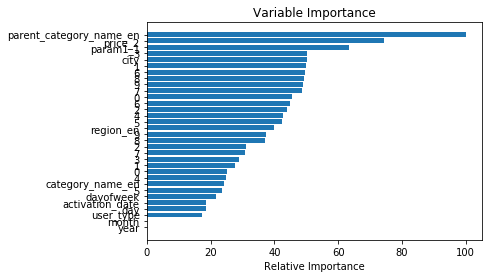

parent_category_name_en 100.0
price_2 74.4638817016
param1_1 63.3354704552
3 50.3317003591
city 50.2128554046
1 49.7774017626
6 49.6469554442
8 49.1387280125
9 48.868142512
7 48.6805620995
0 45.4493915561
6 44.914292863
2 44.0046877926
4 42.5997344137
5 42.2499230737
region_en 40.0292449144
9 37.3004618123
8 37.2000650249
2 31.205145626
7 30.7050643446
3 28.7518907504
1 27.5740902237
0 24.9970539224
4 24.8276589584
category_name_en 24.2534674145
5 23.6159047005
dayofweek 21.786560102
activation_date 18.6555533194
day 18.5181844958
user_type 17.288236107
month 0.00297681452404
year 0.0


In [134]:
varImpPlot(forest, feature_cols, topN=32)

In [130]:
feature_importance = forest.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_cols_ar = np.array(feature_cols)
new_feature_cols = feature_cols_ar[feature_importance > 0]
new_feature_cols

NameError: name 'feature_cols' is not defined

In [303]:
train_df2[new_feature_cols].head()

KeyError: '[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25\n 26 27 28 29 30 31] not in index'

In [363]:
# 予測値を計算
test_df_pred = forest.predict(test_df4)


In [218]:
test_df_pred

array([ 0.04566   ,  0.45510735,  0.079783  , ...,  0.045271  ,
        0.47      ,  0.065116  ])

In [393]:
s = pd.Series(test_df_pred)
s.head()

0    0.047015
1    0.758867
2    0.176909
3    0.241810
4    0.327822
dtype: float64

In [365]:
test_df["item_id"].head()

0    6544e41a8817
1    65b9484d670f
2    8bab230b2ecd
3    8e348601fefc
4    8bd2fe400b89
Name: item_id, dtype: object

In [366]:
submission = pd.concat([test_df["item_id"], s], axis=1)
submission.head()

,item_id,0
0,6544e41a8817,0.047015
1,65b9484d670f,0.758867
2,8bab230b2ecd,0.176909
3,8e348601fefc,0.241810
4,8bd2fe400b89,0.327822


In [367]:
submission = submission.rename(columns={0: 'deal_probability'})
submission.head()

,item_id,deal_probability
0,6544e41a8817,0.047015
1,65b9484d670f,0.758867
2,8bab230b2ecd,0.176909
3,8e348601fefc,0.241810
4,8bd2fe400b89,0.327822


In [368]:
submission.to_csv("submission1.csv",index=False)

In [66]:
test_df = pd.read_csv("test.csv")
test_df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,4,2017-04-16,Private,NaN,NaN
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.0,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2960.0
3,8e348601fefc,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,NaN,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами....",4500.0,70,2017-04-17,Private,NaN,NaN
4,8bd2fe400b89,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,NaN,NaN,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...,4900.0,15,2017-04-15,Private,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...,1002.0


<p>▼lightgbm</p>

In [186]:
import lightgbm as lgb

In [195]:
##### create dataset for lightgbm
#lgb_train = lgb.Dataset(X_train, y_train)
#lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
# LightGBM parameters
#     'task' : 'train',

lgb_estimator = lgb.LGBMRegressor(boosting_type='gbdt',
                                  objective='regression',
                                  bagging_freq=5,
                                  num_boost_round=840,
                                  learning_rate=0.1,
                                  eval_metric='l2',
                                  bagging_fraction = 0.8, 
                                  feature_fraction = 0.9,
                                  verbose = 1,
                                  max_depth = 7,
                                  n_estimators = 15
                                 )


gbm.fit(X_train, y_train)

C:\Users\jin__tonic\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\jin__tonic\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\jin__tonic\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\jin__tonic\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\jin__tonic\Anaconda3\lib\site-packages\

GridSearchCV(cv=3, error_score='raise',
       estimator=LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, eval_metric='l2',
       feature_fraction=0.9, learning_rate=0.1, max_depth=11,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estima...ambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 20]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [ ]:
# create dataset for lightgbm
#lgb_train = lgb.Dataset(X_train, y_train)
#lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
# LightGBM parameters
#     'task' : 'train',

params = {
        'n_estimators':[1,2,20]
}
lgb_estimator = lgb.LGBMRegressor(boosting_type='gbdt',
                                  objective='regression',
                                  bagging_freq=5,
                                  num_boost_round=50,
                                  learning_rate=0.1,
                                  eval_metric='l2',
                                  bagging_fraction = 0.8, 
                                  feature_fraction = 0.9,
                                  verbose = 0,
                                  max_depth = 11,
                                  n_estimators = 1
                                  )


# train
gbm =  GridSearchCV(lgb_estimator,params,  cv=3,scoring= )
gbm.fit(X_train, y_train)

In [ ]:
gbm.grid_scores_

In [124]:
gbm.best_params_

{'n_estimators': 1}

In [110]:
gbm = lgb.LGBMRegressor(boosting_type='gbdt',
                                  objective='regression',
                                  bagging_freq=5,
                                  num_boost_round=50,
                                  learning_rate=0.1,
                                  eval_metric='l2',
                                  bagging_fraction = 0.8, 
                                  num_leaves = 31,
                                  feature_fraction = 0.9,
                                  verbose = 0,
                                  max_depth = 11,
                                  n_estimators = 1
                                  )
gbm.fit(X_train, y_train)

C:\Users\jin__tonic\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, eval_metric='l2',
       feature_fraction=0.9, learning_rate=0.1, max_depth=11,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=1, n_jobs=-1, num_boost_round=50, num_leaves=31,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1, verbose=0)

In [196]:
# 予測値を計算
#y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_train_pred2 = gbm.predict(X_train)
y_test_pred2 = gbm.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred2), mean_squared_error(y_test, y_test_pred2)))
# R^2の計算
from sklearn.metrics import r2_score
print('r2_score train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred2), r2_score(y_test, y_test_pred2)))


MSE train : 0.054, test : 0.054
r2_score train : 0.207, test : 0.202


In [197]:
test_df_pred2 = gbm.predict(test_df4)

In [198]:
test_df_pred2

array([ 0.11064283,  0.20026032,  0.19200384, ...,  0.04176222,
        0.31517685,  0.13348911])

In [200]:
s2 = pd.Series(test_df_pred2)
s2.head(1000)

0      0.110643
1      0.200260
2      0.192004
3      0.161361
4      0.269821
5      0.110345
6      0.080129
7      0.036585
8      0.125196
9      0.074859
10     0.371340
11     0.077040
12     0.301484
13     0.071231
14     0.128244
15     0.259734
16     0.103452
17     0.066112
18     0.054856
19     0.501747
20     0.043623
21     0.166789
22     0.180882
23     0.060742
24     0.535591
25     0.050456
26     0.181253
27     0.168116
28     0.070936
29     0.326927
         ...   
970    0.168028
971    0.090556
972    0.097459
973    0.045734
974    0.253877
975    0.064127
976    0.201084
977    0.406144
978    0.029543
979    0.137449
980    0.071734
981    0.072724
982    0.232668
983    0.274460
984    0.041364
985    0.049909
986    0.073485
987    0.113103
988    0.216305
989    0.162318
990    0.126537
991    0.301067
992    0.071820
993    0.096733
994    0.047680
995    0.070755
996    0.150896
997    0.075797
998    0.080171
999    0.075435
Length: 1000, dtype: flo

In [201]:
test_df["item_id"].head()

0    6544e41a8817
1    65b9484d670f
2    8bab230b2ecd
3    8e348601fefc
4    8bd2fe400b89
Name: item_id, dtype: object

In [202]:
submission = pd.concat([test_df["item_id"], s2], axis=1)
submission.head()

,item_id,0
0,6544e41a8817,0.110643
1,65b9484d670f,0.200260
2,8bab230b2ecd,0.192004
3,8e348601fefc,0.161361
4,8bd2fe400b89,0.269821


In [203]:
submission = submission.rename(columns={0: 'deal_probability'})
submission.head()

,item_id,deal_probability
0,6544e41a8817,0.110643
1,65b9484d670f,0.200260
2,8bab230b2ecd,0.192004
3,8e348601fefc,0.161361
4,8bd2fe400b89,0.269821


In [204]:
submission["deal_probability"] = submission["deal_probability"].mask(submission["deal_probability"] < 0, 0)
submission.head()
submission.to_csv("submission2.csv",index=False)

In [416]:
submission2 = submission

In [405]:
submission["deal_probability2"] = s
submission["deal_probability"] = submission["deal_probability"].mask(submission["deal_probability"] < 0, submission["deal_probability2"])
submission = submission.drop("deal_probability2", axis = 1)
submission.head()

,item_id,deal_probability
0,6544e41a8817,0.110377
1,65b9484d670f,0.351800
2,8bab230b2ecd,0.191039
3,8e348601fefc,0.320156
4,8bd2fe400b89,0.183369


<p>▼xgboost</p>

In [125]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor()
xgb = GridSearchCV(xgb_model,
                   {'max_depth': [5,7],
     z               'n_estimators': [100,200]}, verbose=1)
xgb.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 467.1min finished


KeyboardInterrupt: 

In [125]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb = xgb.XGBRegressor()
xgb = GridSearchCV(xgb_model,
                   {'max_depth': [5,7],
                    'n_estimators': [100,200]}, verbose=1)
xgb.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 467.1min finished


KeyboardInterrupt: 

In [126]:
xgb.grid_scores_

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [75]:
xgb.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [76]:
y_train_pred3 = xgb.predict(X_train)
y_test_pred3 = xgb.predict(X_test)

# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred3), mean_squared_error(y_test, y_test_pred3)))
# R^2の計算
from sklearn.metrics import r2_score
print('r2_score train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred3), r2_score(y_test, y_test_pred3)))

MSE train : 0.054, test : 0.054
r2_score train : 0.202, test : 0.200


In [77]:
test_df_pred3 = xgb.predict(test_df4)

In [81]:
s3 = pd.Series(test_df_pred3)
test_df["item_id"].head()
submission3 = pd.concat([test_df["item_id"], s3], axis=1)
submission3 = submission3.rename(columns={0: 'deal_probability'})
submission3["deal_probability"] = submission3["deal_probability"].mask(submission3["deal_probability"] < 0, 0)
submission3.to_csv("submission4.csv",index=False)

<p>▼SVR</p>

In [428]:
# SVR
from sklearn.svm import SVR
from sklearn import svm

In [ ]:
svr = svm.SVR(kernel='rbf', C=1).fit(X_train, y_train)
svr.fit(X_train, y_train)


In [ ]:
y_train_pred4 = svr.predict(X_traint)
y_test_pred4 = svr.predict(X_test)

# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred4), mean_squared_error(y_test, y_test_pred4)))
# R^2の計算
from sklearn.metrics import r2_score
print('r2_score train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred4), r2_score(y_test, y_test_pre4)))

<p>▼メモリが足りなくなったとき変数を消すやつ</p>

In [32]:
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_"):
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

|            Variable Name|    Memory|
 ------------------------------------ 
|             GridSearchCV|      1056|
|                       In|       344|
|                LinearSVC|      1056|
|       LogisticRegression|      1056|
|                    MeCab|        80|
|                      NMF|      1056|
|                      Out|       240|
|                 Pipeline|      1056|
|    RandomForestRegressor|      1056|
|          TfidfVectorizer|      1056|
|             TruncatedSVD|      1056|
|           accuracy_score|       136|
|             category_map|      2280|
|    classification_report|       136|
|         confusion_matrix|       136|
|               csr_matrix|       888|
|                     exit|        56|
|              get_ipython|        64|
|                   joblib|        80|
|               lil_matrix|      1056|
|       mean_squared_error|       136|
|                       np|        80|
| parent_category_name_map|       368|
|                       p

In [22]:
del a,b,c,dict,price_dict,train_df